In [ ]:
pip install scikit-learn-extra

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import cluster
import seaborn as sns
from sklearn import metrics

In [161]:
# функции для вычисления метрик качества кластерищации
#Calinski-Harabasz index 
def Cal_Har_index(data,labels):
    res = metrics.calinski_harabasz_score(data, labels)
    print("Calinski-Harabasz index:\t{0:.5f}".format(res))

#Davies–Bouldin index 
def Dav_Boul_index(data,labels):
    res = metrics.davies_bouldin_score(data, labels)
    print("Davies–Bouldin index:\t\t{0:.5f}".format(res))    

#Silhouette Coefficient 
def Silhouette_coeff(data,labels,is_manhattan):
    res = 0
    if is_manhattan:
      res = metrics.silhouette_score(data, labels, metric='manhattan')
    else:
      res = metrics.silhouette_score(data, labels, metric='euclidean')
    print("Silhouette Coefficient:\t\t{0:.5f}".format(res))   

def mean_of_subset(data):
    length, parameters = data.shape
    centroid = []
    for i in range(parameters):
        centroid.append(np.sum(data[:, i])/length)
    return np.array(centroid)
#Cluster_cohesion
def Cluster_cohesion(data,labels):
    #этой метрики нет в арсенале sklearn, поэтому реализуем её вручную
    num_clusters = np.unique(labels)
    
    wss = 0
    for k in range(data.shape[0]):
        cluster_subset = []
        for i in range(data.shape[0]):
            if labels[i] == k:
                cluster_subset.append(data[i])
                
        cluster = np.array(cluster_subset)
        if cluster.shape[0] != 0:
            mean_elem = mean_of_subset(cluster)  
        else:
            mean_elem = np.zeros(shape=(data.shape[1]))
        
        for i in range(cluster.shape[0]):
            temp = 0
            for j in range(cluster.shape[1]):
                temp += (cluster[i][j]-mean_elem[j])**2
            wss += temp
    #return wss
    print("Cluster_cohesion:\t\t{0:.5f}".format(wss)) 


def print_metrics(data,labels, true_labels = None, is_manhattan = False):
  Cal_Har_index(data,labels)
  Dav_Boul_index(data,labels)
  Silhouette_coeff(data,labels, is_manhattan)
  Cluster_cohesion(data,labels)
  if true_labels is not None:
    # Adjasted Rand Index
    res = metrics.adjusted_rand_score(true_labels, labels)
    print("Adjasted Rand Index:\t\t{0}\n  ".format(res), end='')


In [ ]:
df1 = pd.read_table('/content/moons.txt',header=None, names=['X','Y','Class'],delimiter=' ')
df1.head()

,X,Y,Class
0,-0.886909,-0.460419,0
1,0.060729,-0.288140,1
2,0.273133,0.199329,1
3,1.553436,-0.413631,1
4,-0.129158,0.426655,0


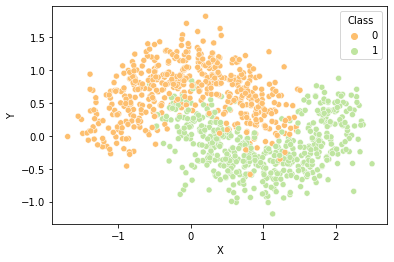

In [ ]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("Spectral", n_colors=2))

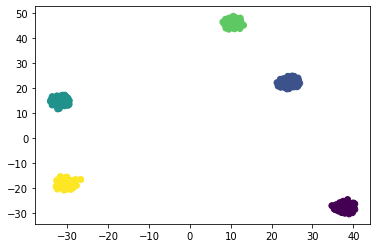

In [6]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples = 1000,n_features=2, centers=5,cluster_std = 1,center_box=(-58.0,58.0),shuffle=False)
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.show()

In [20]:
df = pd.DataFrame(data=np.c_[X,y],columns=['X','Y','Class'])
df.to_csv('data_1.csv')

In [38]:
df1 = pd.read_csv('data_1.csv')
df1.drop(columns='Unnamed: 0', inplace=True)
df1.head()

,X,Y,Class
0,37.705379,-27.489613,0.0
1,39.985478,-28.768783,0.0
2,37.153046,-29.906811,0.0
3,36.324096,-28.425437,0.0
4,38.068208,-26.800032,0.0


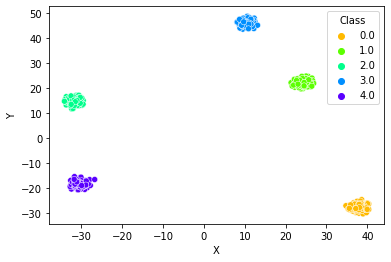

In [67]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df1, palette=sns.color_palette("gist_rainbow", n_colors=5))

In [248]:
from sklearn.preprocessing import StandardScaler
X = df1[['X','Y']]
y = df1['Class']
sc = StandardScaler()
sc.fit(X)
# Apply the scaler to the X training data
X = sc.transform(X)


In [75]:
clustered_X = cluster.KMeans(n_clusters=5, random_state=0).fit(X)

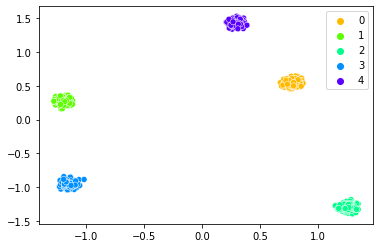

In [99]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))


In [162]:
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

In [156]:
from sklearn_extra.cluster import KMedoids
kmedoids = KMedoids(n_clusters=5, metric='manhattan',init='k-medoids++', random_state=0).fit(X)

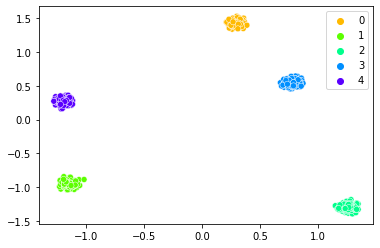

In [157]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
#sns.scatterplot(x=kmedoids.cluster_centers_[:,0], y = kmedoids.cluster_centers_[:,1], hue=[0,0,0,0,0],  palette=sns.color_palette("binary", n_colors=1))


In [163]:
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

In [172]:
2+2

4

In [185]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=0.5, min_samples=10, metric='euclidean').fit(X)


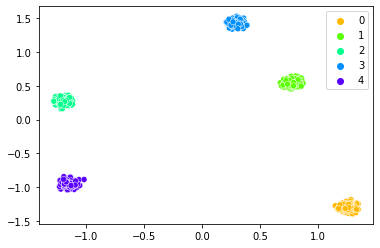

In [186]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [187]:
print_metrics(X,kmedoids.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

In [182]:
clustering = DBSCAN(eps=0.5, min_samples=10, metric='manhattan').fit(X)

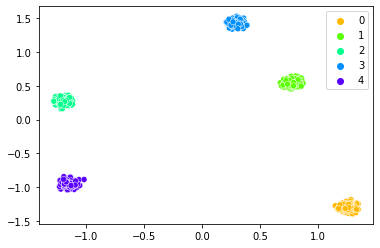

In [183]:
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))


In [188]:
print_metrics(X,kmedoids.labels_,y, True)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

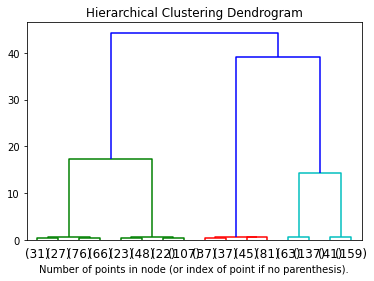

In [191]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

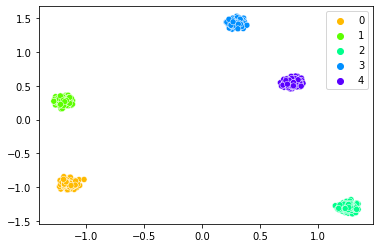

In [249]:
clustering = AgglomerativeClustering(affinity='euclidean', n_clusters=5).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))

In [250]:
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94747
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

Calinski-Harabasz index:	193636.11747
Davies–Bouldin index:		0.07375
Silhouette Coefficient:		0.94413
Cluster_cohesion:		2.56596
Adjasted Rand Index:		1.0
  

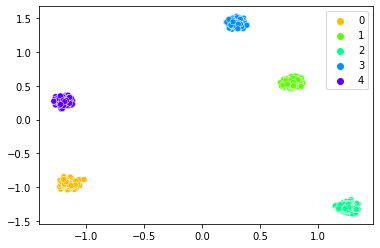

In [251]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='complete', n_clusters=5).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
print_metrics(X,clustering.labels_,y, True)

Датасет 2: линейно разделимые множества (группы расположены близко или касаются друг друга)

In [201]:
df2 = pd.read_table('4_classes.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df2.head()

,X,Y,Class
0,-8.311109,0.332308,1
1,-2.858029,8.874602,2
2,-10.888889,-0.847230,1
3,-13.198113,7.996866,0
4,-6.244634,0.205405,1


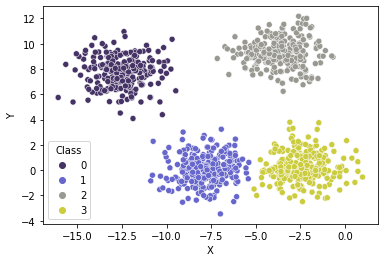

In [206]:
sns.scatterplot(x="X", y="Y", hue='Class', data=df2, palette=sns.color_palette("gist_stern", n_colors=4))

In [252]:
X = df2[['X','Y']]
y = df2['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	4195.79134
Davies–Bouldin index:		0.41994
Silhouette Coefficient:		0.69482
Cluster_cohesion:		146.64987
Adjasted Rand Index:		0.9973306577635366
  

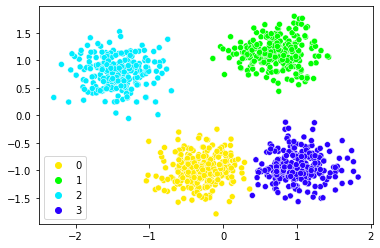

In [208]:
clustered_X = cluster.KMeans(n_clusters=4, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	4194.93062
Davies–Bouldin index:		0.41999
Silhouette Coefficient:		0.67309
Cluster_cohesion:		146.67775
Adjasted Rand Index:		1.0
  

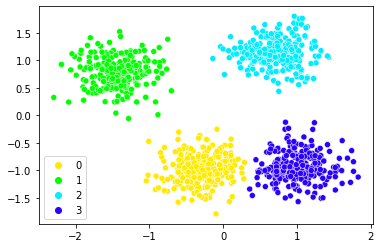

In [211]:
kmedoids = KMedoids(n_clusters=4, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	1944.65524
Davies–Bouldin index:		1.74070
Silhouette Coefficient:		0.65576
Cluster_cohesion:		121.91237
Adjasted Rand Index:		0.9419083154246728
  

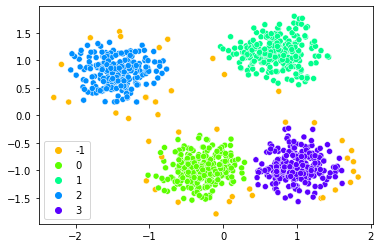

In [224]:
clustering = DBSCAN(eps=0.2, min_samples=10, metric='euclidean').fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=5))
print_metrics(X,clustering.labels_,y)

In [235]:
pd.Series(clustering.labels_).unique()

array([ 0,  1, -1,  2,  3,  5,  4])

Calinski-Harabasz index:	1274.98767
Davies–Bouldin index:		1.50287
Silhouette Coefficient:		0.60710
Cluster_cohesion:		104.24570
Adjasted Rand Index:		0.8792528727799455
  

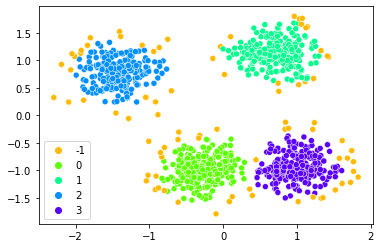

In [244]:
clustering = DBSCAN(eps=0.27, min_samples=25, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

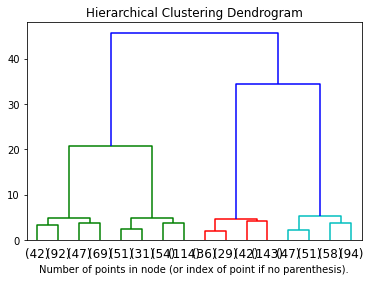

In [245]:

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	4194.93062
Davies–Bouldin index:		0.41999
Silhouette Coefficient:		0.69478
Cluster_cohesion:		146.67775
Adjasted Rand Index:		1.0
  

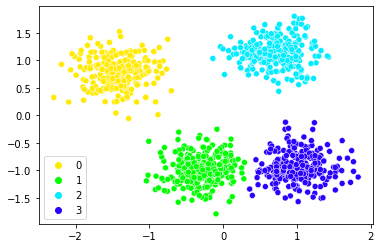

In [253]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='complete', n_clusters=4).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	4194.35674
Davies–Bouldin index:		0.42002
Silhouette Coefficient:		0.67301
Cluster_cohesion:		146.69635
Adjasted Rand Index:		0.994672057173748
  

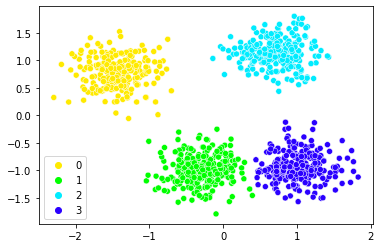

In [259]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='average', n_clusters=4).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=4))
print_metrics(X,clustering.labels_,y, True)

Датасет 3: линейно неразделимое множество (средняя площадь пересечения классов 10-20%)

In [383]:
df3 = pd.read_table('20percent.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df3.head()

,X,Y,Class
0,-3.090713,-0.016803,0
1,-3.404082,-0.262256,0
2,-3.056774,2.329708,0
3,-2.314324,0.691242,0
4,-4.246322,0.951579,0


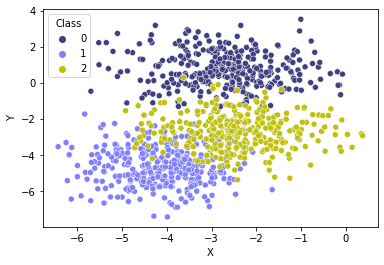

In [264]:
X = df3[['X','Y']]
y = df3['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x="X", y="Y", hue='Class', data=df3, palette=sns.color_palette("gist_stern", n_colors=3))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	970.38623
Davies–Bouldin index:		0.87644
Silhouette Coefficient:		0.41833
Cluster_cohesion:		678.74555
Adjasted Rand Index:		0.6607930282857949
  

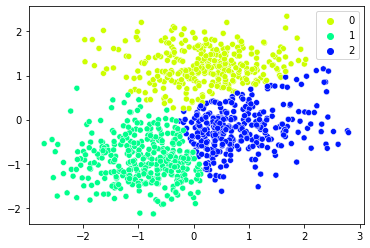

In [268]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	938.35585
Davies–Bouldin index:		0.89760
Silhouette Coefficient:		0.41680
Cluster_cohesion:		693.87615
Adjasted Rand Index:		0.7359760536374653
  

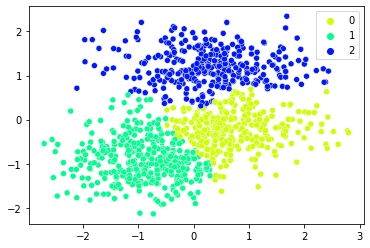

In [269]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	109.19491
Davies–Bouldin index:		2.44930
Silhouette Coefficient:		0.03327
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.19174515278998508
  

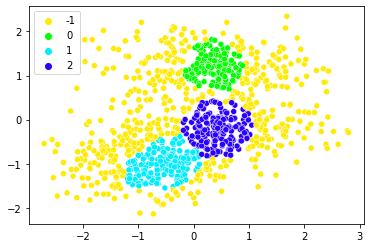

In [325]:
clustering = DBSCAN(eps=0.35, min_samples=57, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

Метрики качества, если убрать точки, которые DBSCAN считает выбросами

In [337]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1365.13836
Davies–Bouldin index:		0.58730
Silhouette Coefficient:		0.57117
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.7927715481810441
  

Calinski-Harabasz index:	133.68642
Davies–Bouldin index:		2.33256
Silhouette Coefficient:		0.09771
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.25567581340053697
  

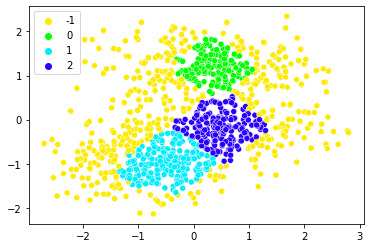

In [367]:
clustering = DBSCAN(eps=0.5, min_samples=70, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

In [368]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1226.46158
Davies–Bouldin index:		0.65764
Silhouette Coefficient:		0.52327
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.7499870791452407
  

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

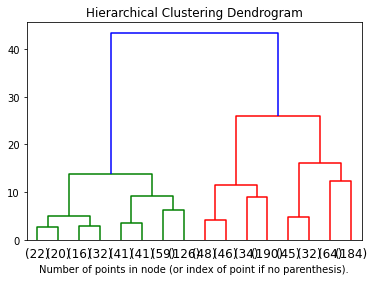

In [369]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	890.60899
Davies–Bouldin index:		0.94286
Silhouette Coefficient:		0.39275
Cluster_cohesion:		717.72626
Adjasted Rand Index:		0.73452850570127
  

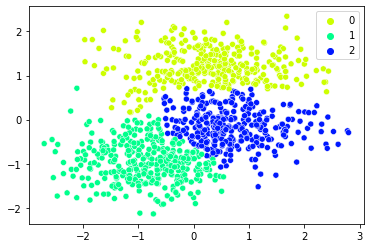

In [374]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	573.82687
Davies–Bouldin index:		0.79904
Silhouette Coefficient:		0.33608
Cluster_cohesion:		929.75382
Adjasted Rand Index:		0.43387658913892135
  

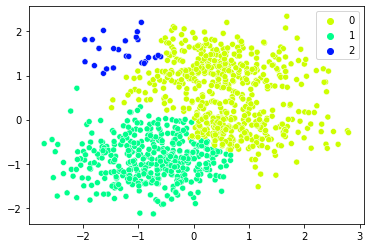

In [380]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='average', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y, True)

Датасет 4: линейно неразделимое множество (средняя площадь пересечения классов 50-70%)

In [384]:
df4 = pd.read_table('70percent.txt',header=None,names=['X','Y','Class'], delimiter=' ')
df4.head()

,X,Y,Class
0,7.464167,-1.024549,0
1,5.654921,1.884601,0
2,2.342275,-0.876452,0
3,6.256039,-4.669304,0
4,3.905153,0.174061,0


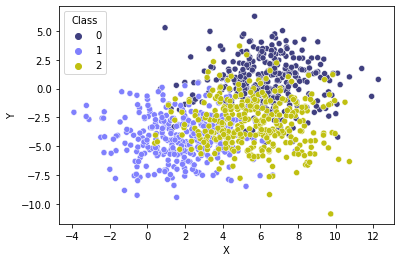

In [385]:
X = df3[['X','Y']]
y = df3['Class']
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
sns.scatterplot(x="X", y="Y", hue='Class', data=df4, palette=sns.color_palette("gist_stern", n_colors=3))

K-means с евклидовым рассотоянием и манхеттанским (k-mediods)

Calinski-Harabasz index:	970.38623
Davies–Bouldin index:		0.87644
Silhouette Coefficient:		0.41833
Cluster_cohesion:		678.74555
Adjasted Rand Index:		0.6607930282857949
  

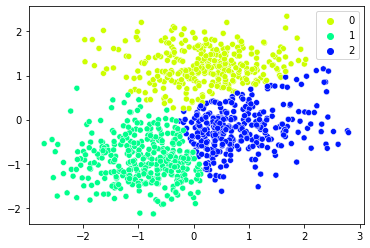

In [386]:
clustered_X = cluster.KMeans(n_clusters=3, random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustered_X.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustered_X.labels_,y)

Calinski-Harabasz index:	938.35585
Davies–Bouldin index:		0.89760
Silhouette Coefficient:		0.41680
Cluster_cohesion:		693.87615
Adjasted Rand Index:		0.7359760536374653
  

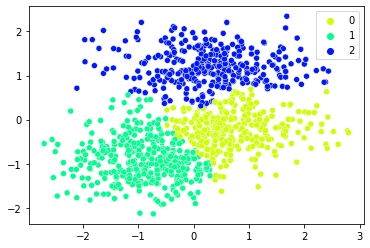

In [387]:
kmedoids = KMedoids(n_clusters=3, metric='manhattan',init='k-medoids++', random_state=0).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=kmedoids.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,kmedoids.labels_,y, True)

DBSCAN с евклидовским и манхеттанским расстояними

Calinski-Harabasz index:	109.19491
Davies–Bouldin index:		2.44930
Silhouette Coefficient:		0.03327
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.19174515278998508
  

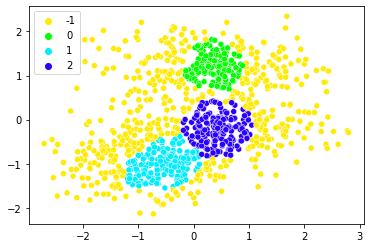

In [388]:
clustering = DBSCAN(eps=0.35, min_samples=57, metric='euclidean').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

In [389]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1365.13836
Davies–Bouldin index:		0.58730
Silhouette Coefficient:		0.57117
Cluster_cohesion:		84.46853
Adjasted Rand Index:		0.7927715481810441
  

Calinski-Harabasz index:	133.68642
Davies–Bouldin index:		2.33256
Silhouette Coefficient:		0.09771
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.25567581340053697
  

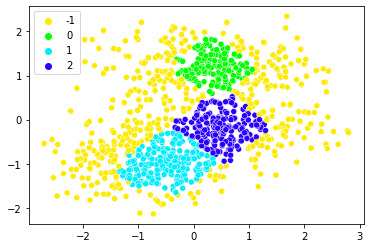

In [390]:
clustering = DBSCAN(eps=0.5, min_samples=70, metric='manhattan').fit(X)
n_cl = len(pd.Series(clustering.labels_).unique())
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=n_cl))
print_metrics(X,clustering.labels_,y)

In [391]:
df_c = pd.DataFrame(np.c_[X,clustering.labels_,y], columns=['X','Y','Class','Tr_Class'])
df_c = df_c[df_c.Class != -1]
print_metrics(df_c[['X','Y']].values,df_c.Class.values,df_c.Tr_Class.values)

Calinski-Harabasz index:	1226.46158
Davies–Bouldin index:		0.65764
Silhouette Coefficient:		0.52327
Cluster_cohesion:		124.96802
Adjasted Rand Index:		0.7499870791452407
  

Иерархический агломеративный метод с евклидовым и манхеттанским расстояниями

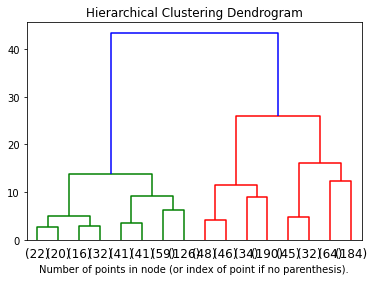

In [392]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

Calinski-Harabasz index:	890.60899
Davies–Bouldin index:		0.94286
Silhouette Coefficient:		0.39275
Cluster_cohesion:		717.72626
Adjasted Rand Index:		0.73452850570127
  

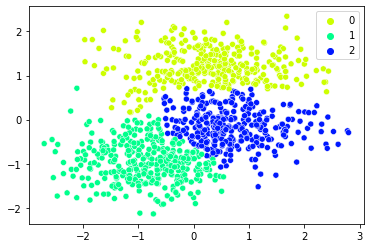

In [393]:
clustering = AgglomerativeClustering(affinity='euclidean',linkage='ward', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y)

Calinski-Harabasz index:	573.82687
Davies–Bouldin index:		0.79904
Silhouette Coefficient:		0.33608
Cluster_cohesion:		929.75382
Adjasted Rand Index:		0.43387658913892135
  

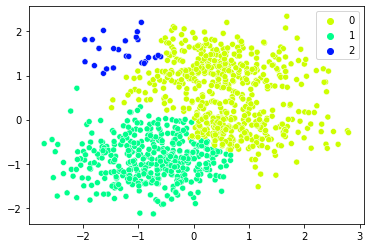

In [400]:
clustering = AgglomerativeClustering(affinity='manhattan',linkage='average', n_clusters=3).fit(X)
sns.scatterplot(x=X[:,0], y = X[:,1], hue=clustering.labels_,  palette=sns.color_palette("gist_rainbow", n_colors=3))
print_metrics(X,clustering.labels_,y, True)